In [60]:
import cv2
import numpy as np
court_picture_path_1 = 'F:\SeniorProject\court_photos\pro_court_1_crop.png'
court_picture_path_2 = 'F:\SeniorProject\court_photos\center_court_crop.png'
court_picture_path_2 = 'F:\SeniorProject\court_photos\center_view_1.jpg'
court_picture_path_2 = 'F:\SeniorProject\court_photos\shady_court.png'
court_picture_1 = cv2.imread(court_picture_path_1)
court_picture_2 = cv2.imread(court_picture_path_2)
if court_picture_1 is None or court_picture_2 is None:
    print('Error: cannot load image!')
    exit(-1)

In [40]:
import matplotlib.pyplot as plt
def show_image(img):
    # convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)
    plt.show()
    return
    cv2.imshow('image', img)
    cv2.waitKey(0)
    # cv2.destroyAllWindows()

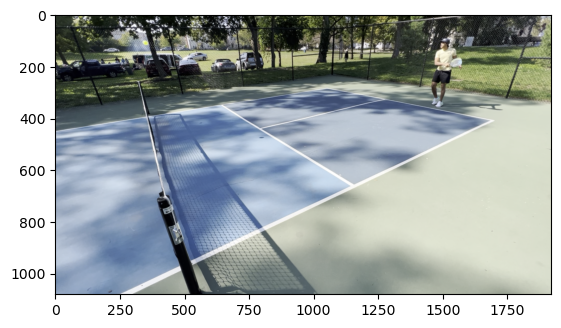

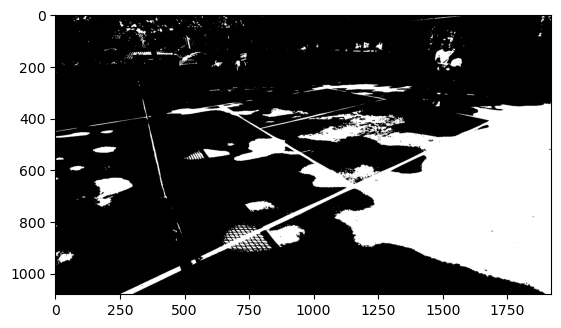

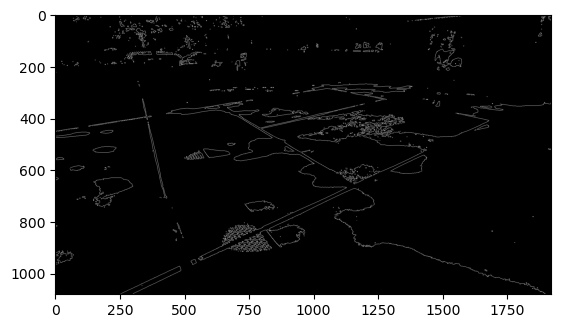

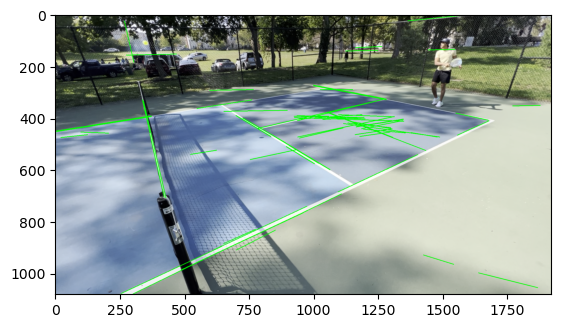

In [61]:
# prefilter the image

# gaussian blur
blurred = cv2.GaussianBlur(court_picture_2, (3, 3), 0)
show_image(blurred)

threshold = 190
# find white lines
white_lines = cv2.inRange(blurred, (threshold, threshold, threshold), (255, 255, 255))
show_image(white_lines)

# erode and dilate
# kernel = np.ones((2, 2), np.uint8)
# white_lines = cv2.erode(white_lines, kernel, iterations=3)
# white_lines = cv2.dilate(white_lines, kernel, iterations=3)
# show_image(white_lines)

# edge detector
edges = cv2.Canny(white_lines, 50, 150, apertureSize=3)
show_image(edges)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=50)

# draw lines
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(blurred, (x1, y1), (x2, y2), (0, 255, 0), 2)
show_image(blurred)
cv2.destroyAllWindows()

In [39]:
smoothed = cv2.GaussianBlur(court_picture_2, (5, 5), 0)
# smoothed = cv2.cvtColor(smoothed, cv2.COLOR_BGR2GRAY)
show_image(smoothed)

# apply canny directly
edges = cv2.Canny(smoothed, 50, 150, apertureSize=3)
show_image(edges)

# # harris corner detection on smoothed image
# gray = cv2.cvtColor(smoothed, cv2.COLOR_BGR2GRAY)
# gray = np.float32(gray)
# dst = cv2.cornerHarris(gray, 5, 3, 0.01)
# dst = cv2.dilate(dst, None)
# show_image(dst)

# find contours
countours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# filter countours by area
countours = [c for c in countours if cv2.contourArea(c) > 15]

# draw contours
cv2.drawContours(smoothed, countours, -1, (0, 255, 0), 1)
show_image(smoothed)

# line detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

# draw lines

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(smoothed, (x1, y1), (x2, y2), (0, 255, 0), 2)

show_image(smoothed)

cv2.destroyAllWindows()
# 

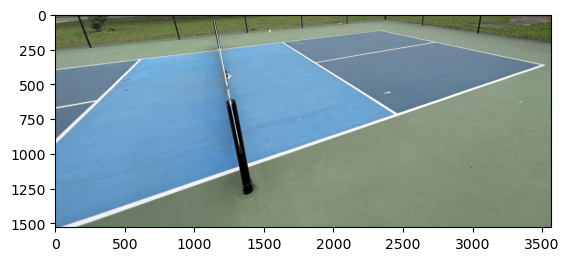

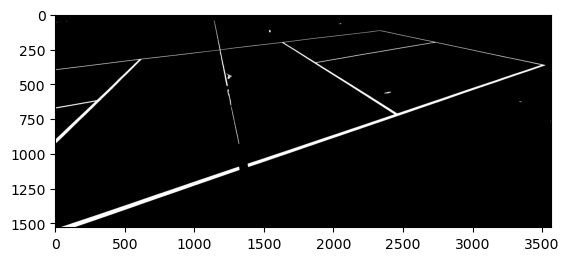

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


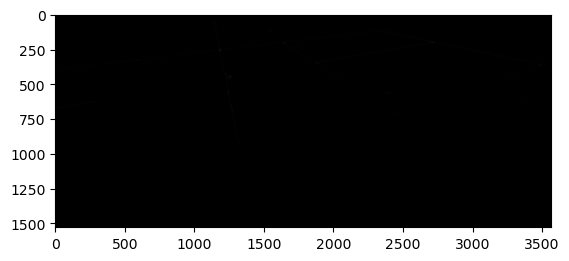

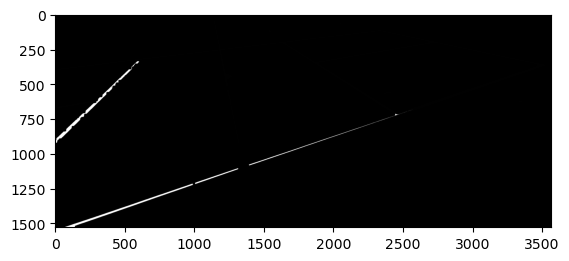

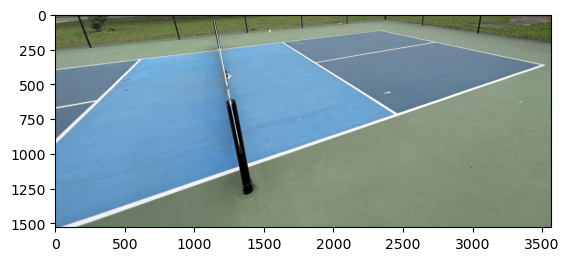

In [59]:
smoothed = cv2.GaussianBlur(court_picture_2, (5, 5), 0)
# smoothed = cv2.cvtColor(smoothed, cv2.COLOR_BGR2GRAY)
show_image(smoothed)

threshold = 190
# find white lines
white_lines = cv2.inRange(smoothed, (threshold, threshold, threshold), (255, 255, 255))
show_image(white_lines)


# # harris corner detection on thresholded image
# gray = cv2.cvtColor(white_lines, cv2.COLOR_BGR2GRAY)
# gray = np.float32(gray)
dst = cv2.cornerHarris(white_lines, 15, 1, 0.01)
dst = cv2.dilate(dst, None)
show_image(dst)

# mark detected corners on white_lines
white_lines[dst>0.01*dst.max()] = [1]
show_image(white_lines)



show_image(smoothed)

cv2.destroyAllWindows()
# 

In [21]:
canny_img = cv2.Canny(court_picture, 50, 200)
show_image(canny_img)

# hough transform
lines = cv2.HoughLinesP(canny_img, 1, np.pi/180, 100, minLineLength=200, maxLineGap=10)
print(lines.shape)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(court_picture, (x1, y1), (x2, y2), (0, 255, 0), 2)
show_image(court_picture)

(345, 1, 4)
